<a href="https://colab.research.google.com/github/girta79/WoTech_Python_Individual_Work/blob/main/lesson_17_8_24_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lesson 17.**

**Topic: Project 2: TV Marketing sales prediction**


1. Know what the Scikit-learn library is and how it is used for model training
2. Know what is supervised and unsupervised training
2. Be able to use the Scikit-learn library to train a linear regression data model
3. Be able to minimally analyze the accuracy of the trained data model
4. Know what is dependend and independent variable
5. Know how to predict outcome based on a new input value

In [ ]:
# LESSON 17.8.24


In [1]:
import pandas as pd

In [3]:
advertising = pd.read_csv('/content/tvmarketing.csv')

# column 'TV' - advertising budget spent on TV marketing
# column 'Sales' - how much we sold (revenue, income)

In [4]:
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [5]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Regression plot

In [6]:
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

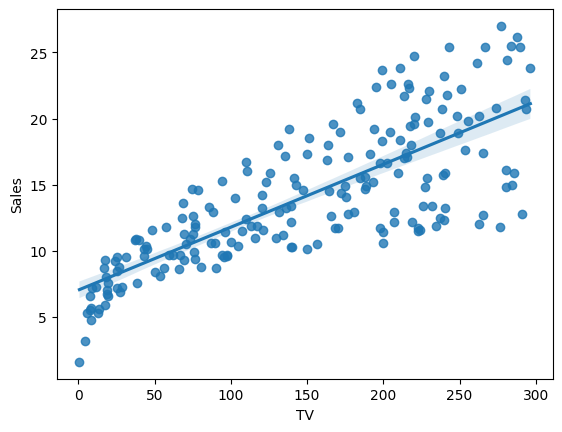

In [7]:
sns.regplot(x = 'TV', y = 'Sales', data = advertising)

<Axes: xlabel='TV', ylabel='Sales'>

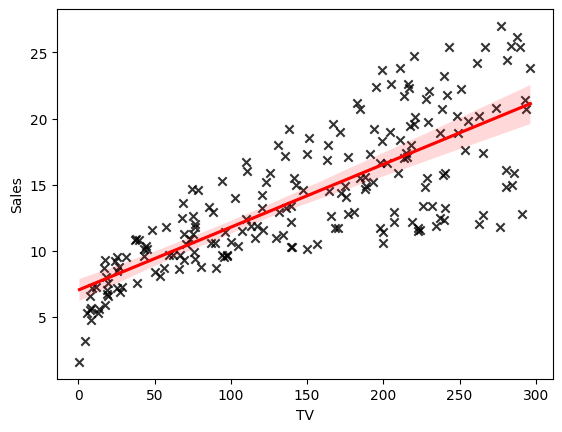

In [9]:
    sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="x",
    color="black",
    line_kws=dict(color="red"))

In [11]:
# Pearson correlation koefficient
advertising.corr() # calculae correlation for whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [12]:
advertising['TV'].corr(advertising['Sales']) # positive, strong correlation

0.7822244248616061

# SUPERVISED VS UNSUPERVISED LEARNING

In [ ]:
# ![jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)

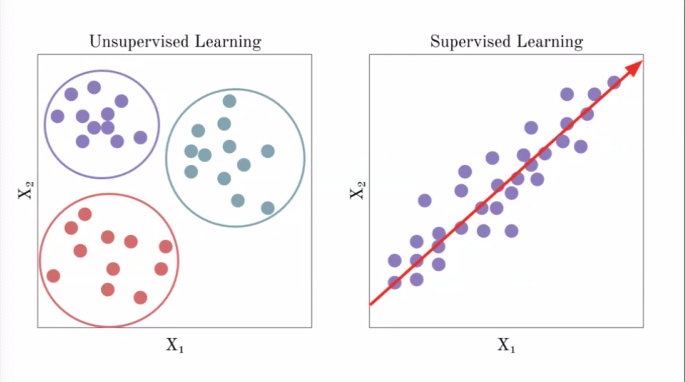

In [14]:
from IPython.display import Image

# path to the screenshot
path = '//content/Screenshot 2024-08-17 at 10.28.21.png'

# display the screenshot
Image(filename=path)

In [ ]:
 # linear regression is unsupervised OR supervised training?


**Supervised vs. Unsupervised Learning Models**

## Supervised Learning:
In supervised learning, the model is trained using a labeled dataset, which means that each training example is paired with an output label. The goal is to learn a mapping from inputs to outputs that can be used to predict the output for new, unseen data.

- **Training Data:** Consists of input-output pairs.
- **Goal:** Predict outputs for new inputs.
- **Common Algorithms:** Linear regression, logistic regression, decision trees, support vector machines, neural networks.

**Examples:**

- **Classification:** Predicting whether an email is spam or not spam.
- **Regression:** Predicting the price of a house given its features (size, location, etc.).



# Unsupervised Learning:
In unsupervised learning, the model is trained using an unlabeled dataset. The goal is to find patterns, structures, or relationships in the data without any specific output labels.

- **Training Data:** Consists of input data without any corresponding output labels.
Goal: Discover the underlying structure of the data.
- **Common Algorithms:** Clustering (e.g., k-means, hierarchical clustering), dimensionality reduction (e.g., PCA, t-SNE), association rule learning.

**Examples:**

- **Clustering:** Grouping customers based on their purchasing behavior.
- **Dimensionality Reduction:** Reducing the number of features in a dataset while retaining important information.

---------------------------------------------------

**Linear Regression: Supervised Learning**

Linear regression is an example of a supervised learning algorithm. It is used to predict a continuous output variable (dependent variable) based on one or more input variables (independent variables). The goal of linear regression is to find the best-fitting line (or hyperplane in higher dimensions) that predicts the output variable from the input variables.

**Key Points about Linear Regression:**
- **Input-Output Relationship:** Linear regression models the relationship between the input variables (features) and the output variable (target) using a linear equation.
- **Training Data:** Requires labeled data, where each input example is paired with a corresponding output label.
- **Output:** Continuous variable.

In [ ]:
# unsupervised - do not have labeled data;
# supervised - have labeled data

In [ ]:
# https://scikit-learn.org/stable/


# Training linear regression mudel

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [15]:
# Preparing X ja Y

X = advertising.drop('Sales', axis=1) # independent variable
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
Y = advertising.drop('TV', axis=1) # the outcome, dependent
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


# Train/ Tests sets

In [ ]:
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7)
X_train

,TV
180,156.6
196,94.2
87,110.7
152,197.6
170,50.0
...,...
55,198.9
69,216.8
95,163.3
123,123.1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state=42)
X_train

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7
...,...
106,25.0
14,204.1
92,217.7
179,165.6


In [ ]:
# COLUMN - FEATURE
# ROW - OBSERVATION

# Train the model

In [19]:
from sklearn.linear_model import LinearRegression # import the model

In [20]:
model = LinearRegression() # initialize the model

In [21]:
model.fit(X_train, y_train) # train the model, fit the model

LinearRegression()

In [23]:
# Y = mX +b

print(f'Model intercept is: {model.intercept_}')
print(f'Model coefficient is: {model.coef_}')

Model intercept is: [7.23945983]
Model coefficient is: [[0.0464078]]


In [24]:
my_new_budget = [[50]] # 2D array dataset  // KONTROLLI ÜLE!!!

my_predicted_sales = model.predict(my_new_budget)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:

print(f'When the new budget is {my_new_budget[0][0]}, then predicted sales are {round(my_predicted_sales[0][0])}.')

When the new budget is 50, then predicted sales are 10.


In [26]:
X_test.head()

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [27]:
y_pred = model.predict(X_test)

In [28]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales']-final_df['Predicted_sales'])
final_df.head()

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.817854,2.082146
15,195.4,22.4,16.307544,6.092456
30,292.9,21.4,20.832305,0.567695
158,11.7,7.3,7.782431,0.482431
128,220.3,24.7,17.463099,7.236901


**Teamwork:**

This is a complicated topic, teamwork is to look at scikit-learn library together. Suggested questions to discuss:
1. What is an error rate?
2. Where you could use other machine-learning models?
3. What is the difference between supervised and unsupervised training?
4. How to import different models from the scikit-learn package?
5. How can you evaluate the performance of a machine learning model in scikit-learn?
6. What metrics are commonly used for evaluation?
7. What is model overfitting, and how can it be prevented?

Linear regression modesls: https://scikit-learn.org/stable/modules/linear_model.html
The overall documentation: https://scikit-learn.org/stable

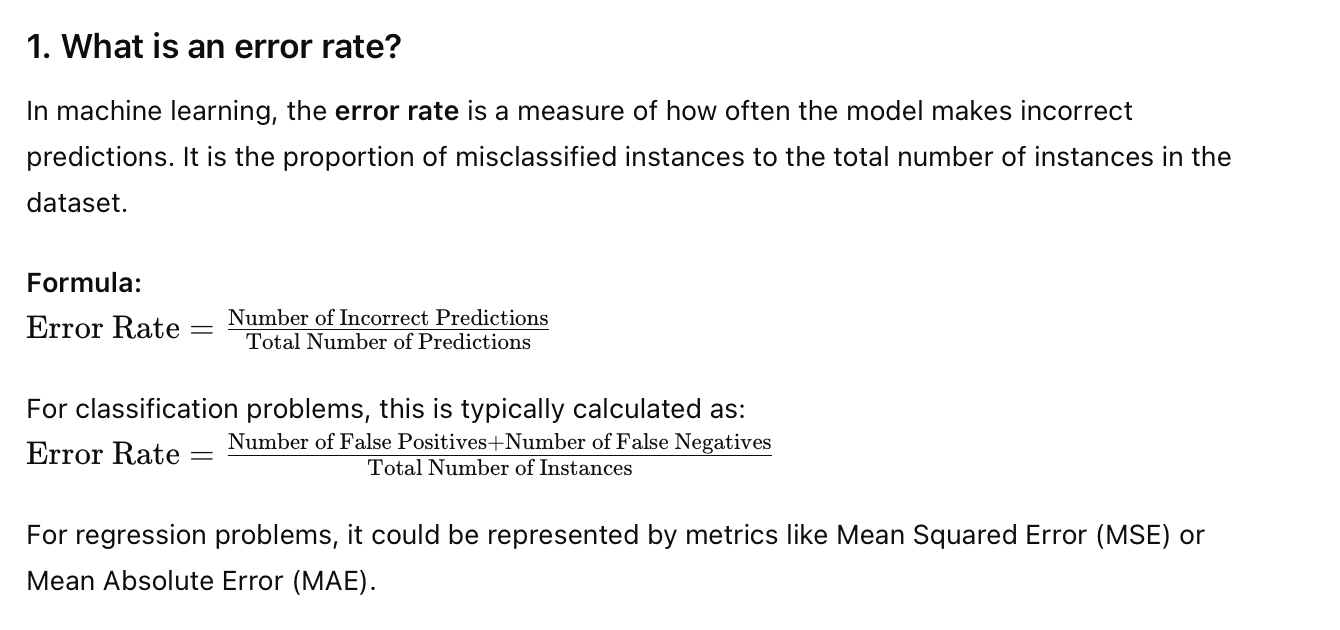

In [29]:
from IPython.display import Image
path = '/content/1.png'
Image(filename=path)

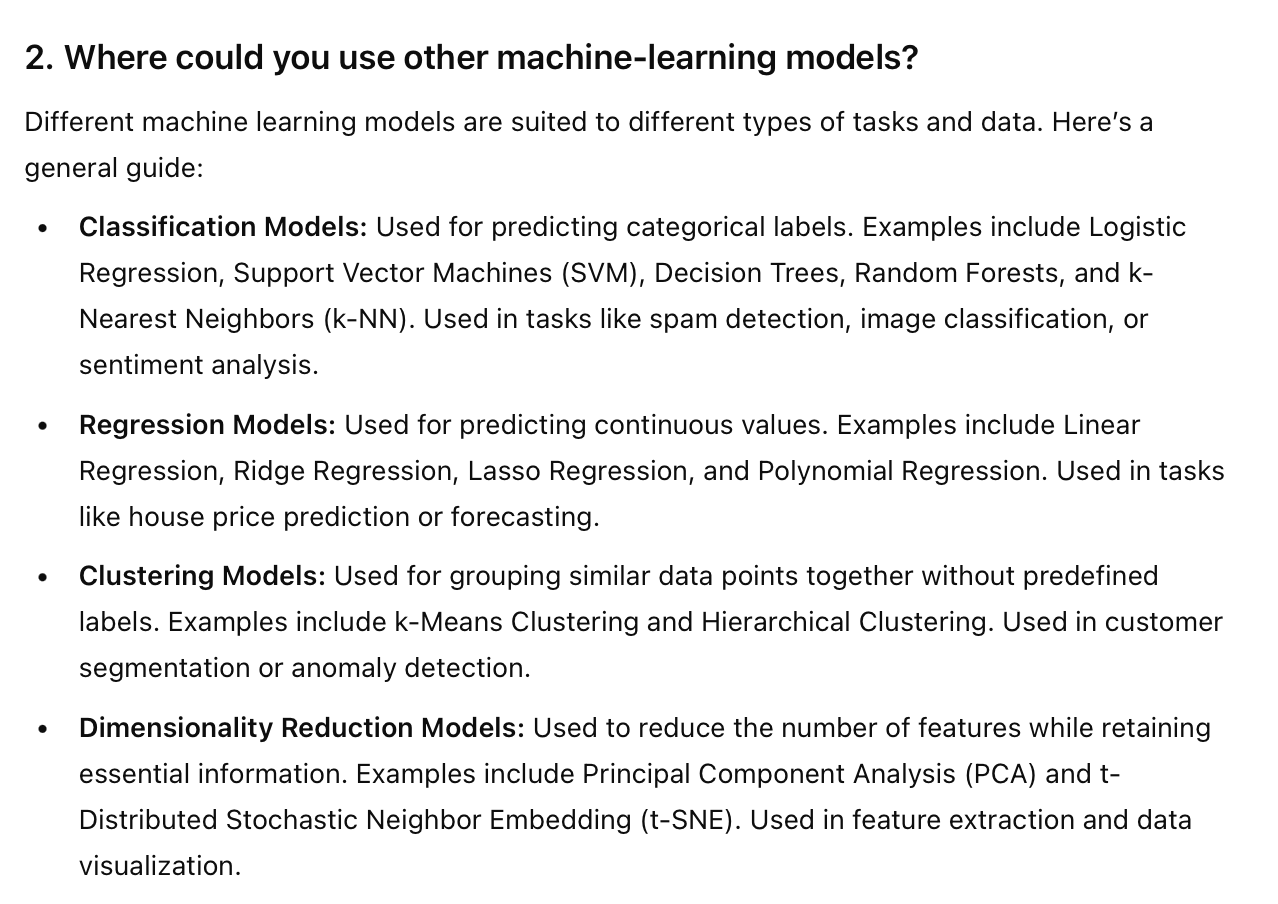

In [30]:
from IPython.display import Image
path = '/content/2.png'
Image(filename=path)

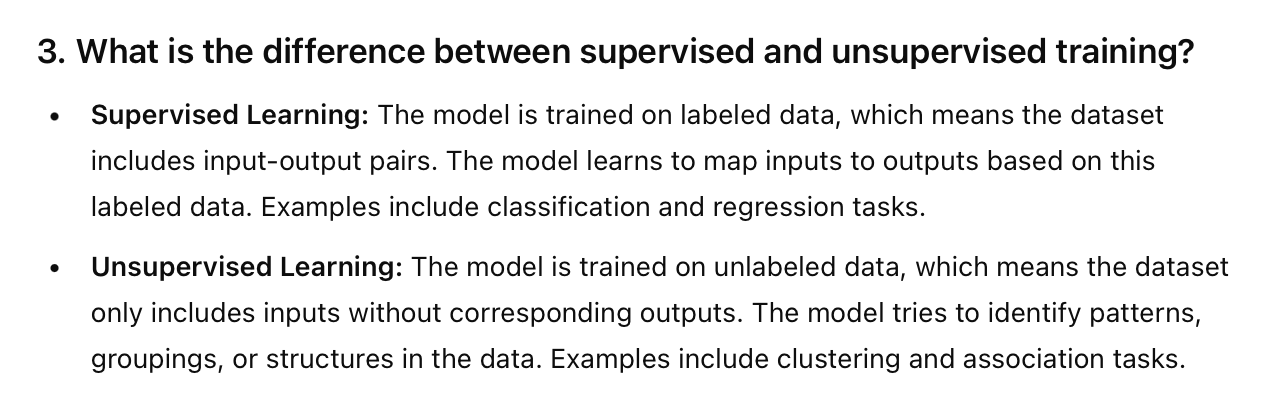

In [31]:
from IPython.display import Image
path = '/content/3.png'
Image(filename=path)

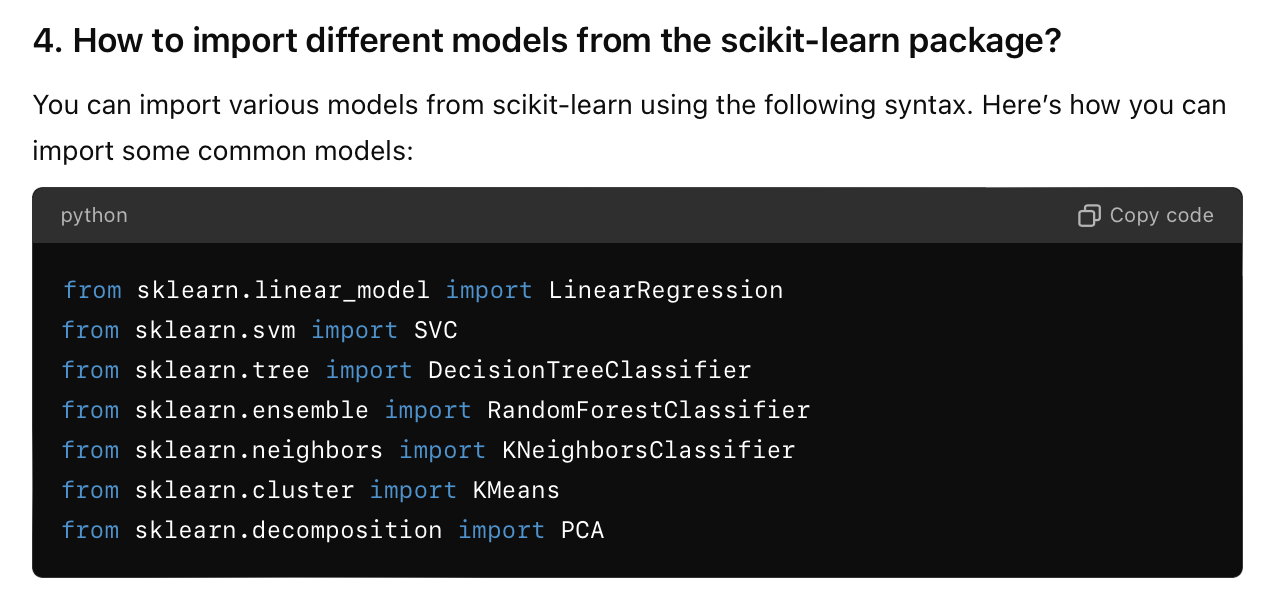

In [32]:
from IPython.display import Image
path = '/content/4.png'
Image(filename=path)

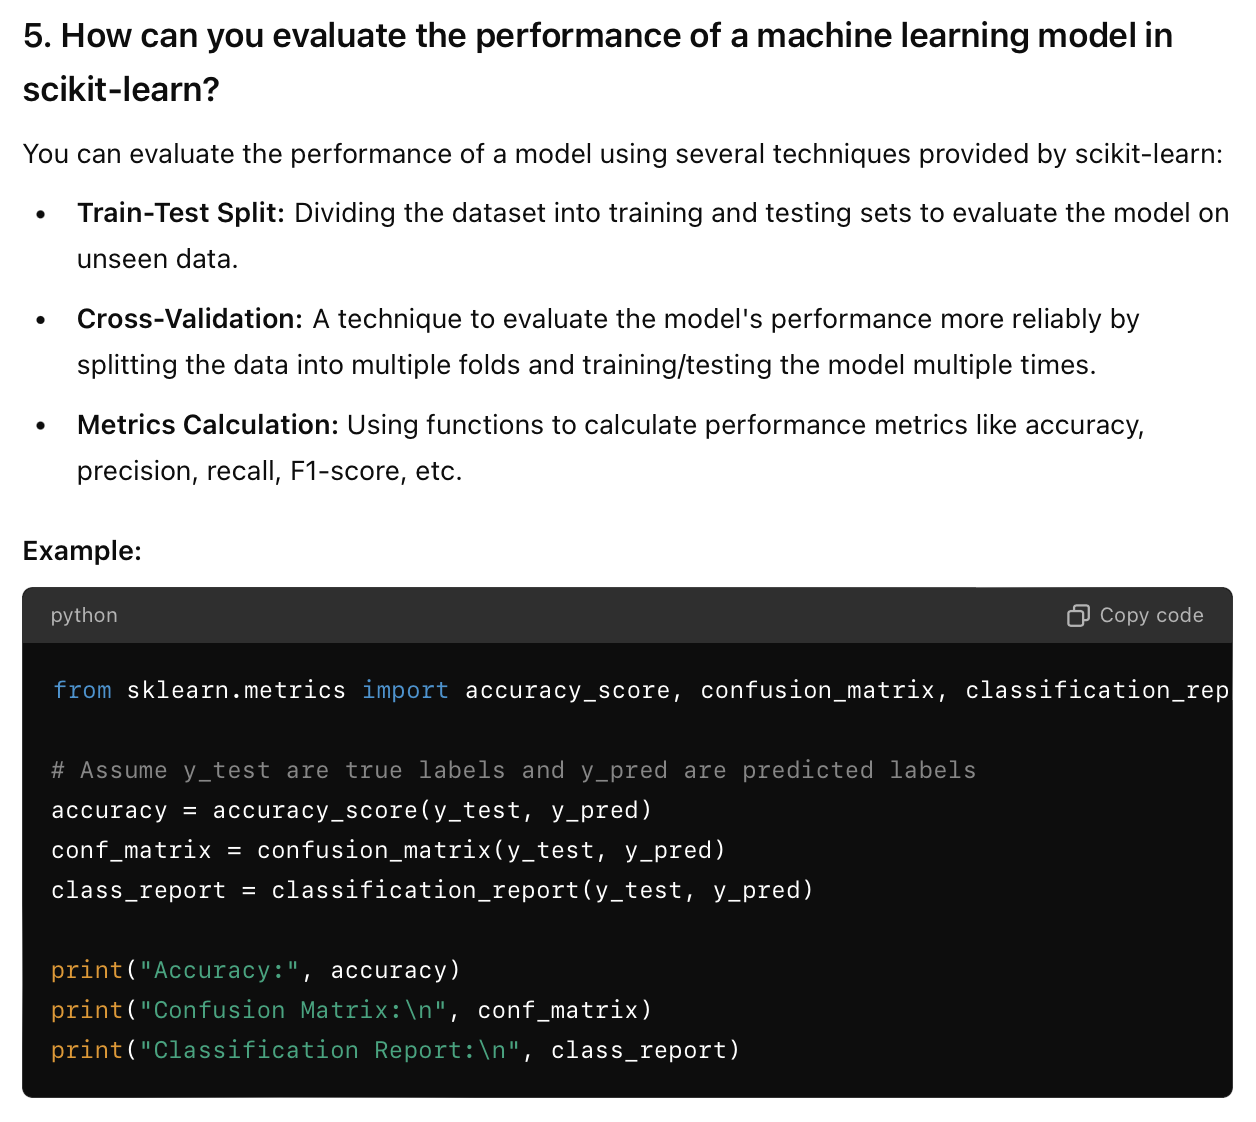

In [33]:
from IPython.display import Image
path = '/content/5.png'
Image(filename=path)

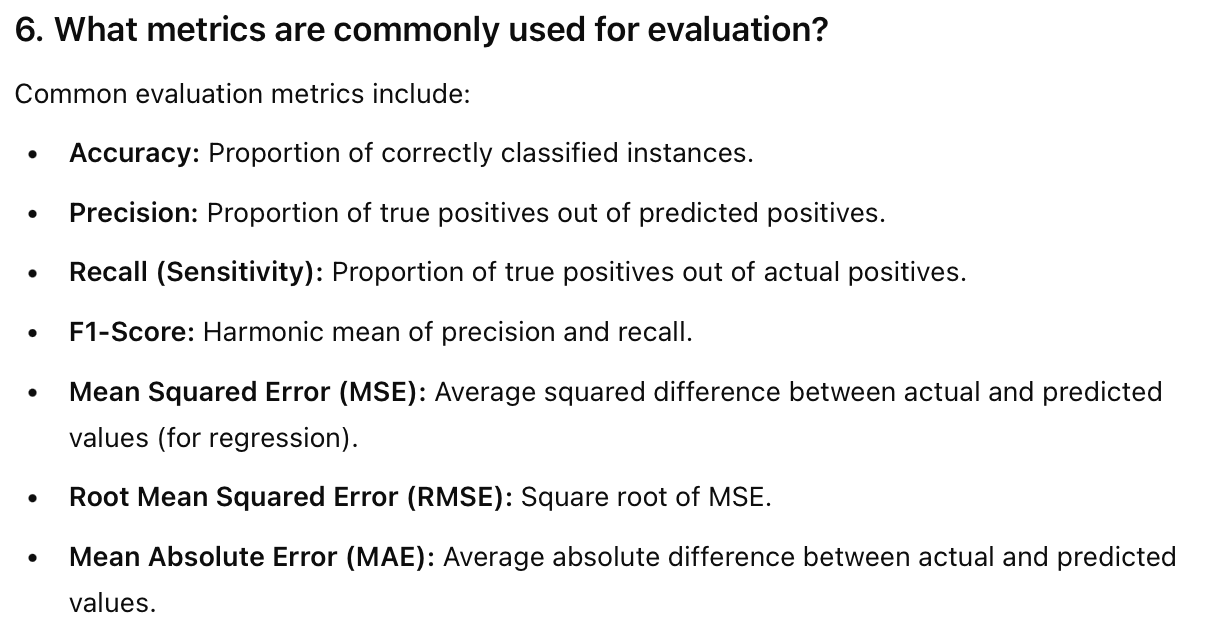

In [34]:
from IPython.display import Image
path = '/content/6.png'
Image(filename=path)

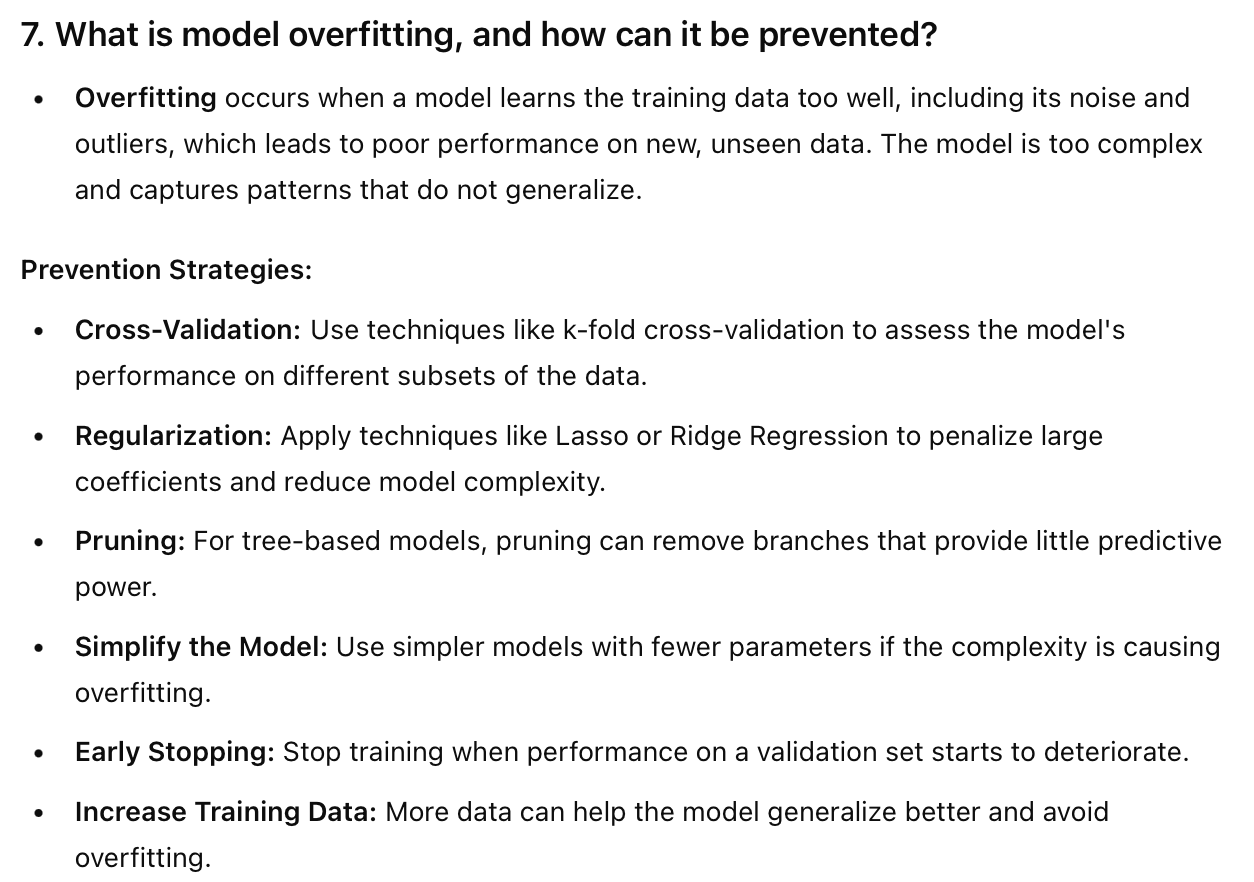

In [35]:
from IPython.display import Image
path = '/content/7.png'
Image(filename=path)

In [ ]:
# https://scikit-learn.org/stable/modules/cross_validation.html

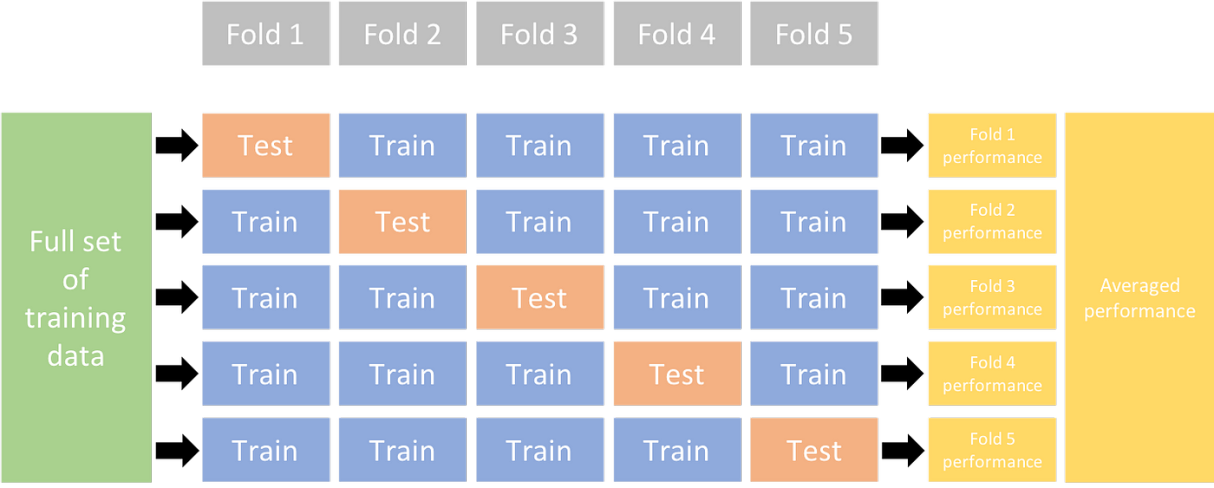

In [36]:
from IPython.display import Image
path = '/content/258589390-8d815058-ece8-48b9-a94e-0e1ab53ea0f6.png'
Image(filename=path)